In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 200
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    # Smooth labels  
    data = torch.ones(size, 1)*0.9
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    # Smooth labels 
    data = torch.ones(size, 1)*0.1
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

  0%|          | 0/117 [00:00<?, ?it/s]

118it [00:21,  5.42it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


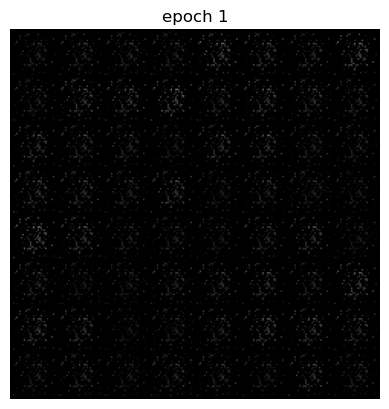

Epoch 1 of 200
Generator loss: 1.52943015, Discriminator loss: 0.98546487


118it [00:21,  5.42it/s]                         


Epoch 2 of 200
Generator loss: 1.18070958, Discriminator loss: 1.17812639


118it [00:22,  5.34it/s]                         


Epoch 3 of 200
Generator loss: 1.60010375, Discriminator loss: 1.20623803


118it [00:22,  5.22it/s]                         


Epoch 4 of 200
Generator loss: 2.47396525, Discriminator loss: 1.20886728


118it [00:20,  5.64it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


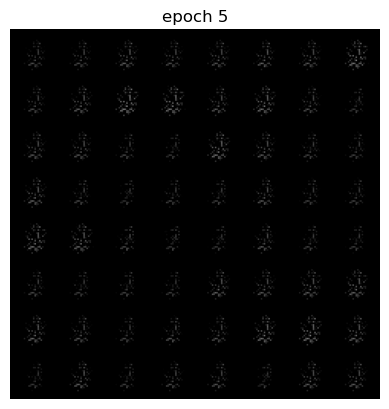

Epoch 5 of 200
Generator loss: 1.74352116, Discriminator loss: 0.94049098


118it [00:21,  5.60it/s]                         


Epoch 6 of 200
Generator loss: 1.71691438, Discriminator loss: 1.18202407


118it [00:21,  5.52it/s]                         


Epoch 7 of 200
Generator loss: 0.86705813, Discriminator loss: 1.25669055


118it [00:21,  5.46it/s]                         


Epoch 8 of 200
Generator loss: 1.31054263, Discriminator loss: 1.19498760


118it [00:21,  5.50it/s]                         


Epoch 9 of 200
Generator loss: 1.47201788, Discriminator loss: 1.15672667


118it [00:22,  5.27it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


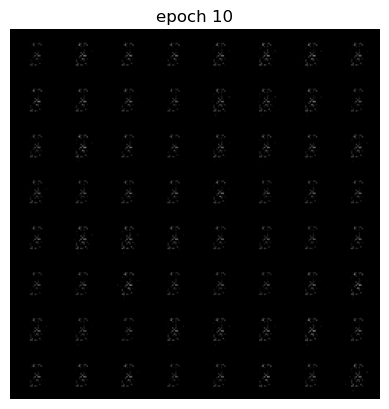

Epoch 10 of 200
Generator loss: 1.21955697, Discriminator loss: 1.20138014


118it [00:21,  5.48it/s]                         


Epoch 11 of 200
Generator loss: 1.17186216, Discriminator loss: 1.18801846


118it [00:22,  5.31it/s]                         


Epoch 12 of 200
Generator loss: 1.70721175, Discriminator loss: 1.14014265


118it [00:21,  5.41it/s]                         


Epoch 13 of 200
Generator loss: 1.63668178, Discriminator loss: 1.22598693


118it [00:22,  5.32it/s]                         


Epoch 14 of 200
Generator loss: 1.27121742, Discriminator loss: 1.24474187


118it [00:23,  5.09it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


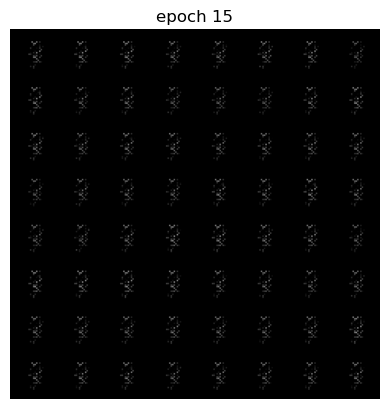

Epoch 15 of 200
Generator loss: 1.28624473, Discriminator loss: 1.19578927


118it [00:22,  5.21it/s]                         


Epoch 16 of 200
Generator loss: 1.56572432, Discriminator loss: 1.13429918


118it [00:22,  5.33it/s]                         


Epoch 17 of 200
Generator loss: 1.06375942, Discriminator loss: 1.20035255


118it [00:22,  5.14it/s]                         


Epoch 18 of 200
Generator loss: 1.24487280, Discriminator loss: 1.11342658


118it [00:21,  5.39it/s]                         


Epoch 19 of 200
Generator loss: 1.26092978, Discriminator loss: 1.15460130


118it [00:21,  5.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


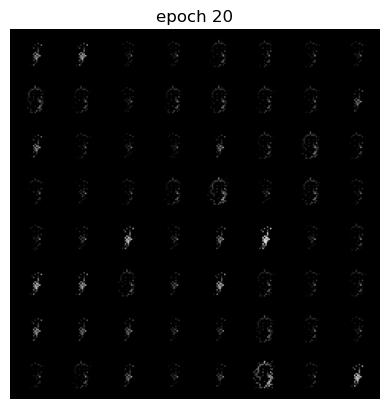

Epoch 20 of 200
Generator loss: 1.21786820, Discriminator loss: 1.15004318


118it [00:20,  5.69it/s]                         


Epoch 21 of 200
Generator loss: 1.63790903, Discriminator loss: 1.06187948


118it [00:20,  5.73it/s]                         


Epoch 22 of 200
Generator loss: 1.57085497, Discriminator loss: 1.09845977


118it [00:22,  5.15it/s]                         


Epoch 23 of 200
Generator loss: 1.38259059, Discriminator loss: 1.10701819


118it [00:20,  5.72it/s]                         


Epoch 24 of 200
Generator loss: 1.67291652, Discriminator loss: 0.99991794


118it [00:20,  5.80it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


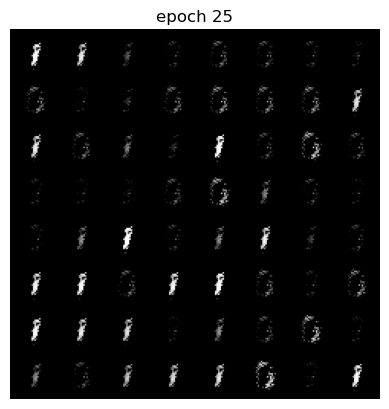

Epoch 25 of 200
Generator loss: 1.55932532, Discriminator loss: 0.94920183


118it [00:20,  5.76it/s]                         


Epoch 26 of 200
Generator loss: 1.63095665, Discriminator loss: 0.89402511


118it [00:20,  5.62it/s]                         


Epoch 27 of 200
Generator loss: 1.68052291, Discriminator loss: 0.97686096


118it [00:21,  5.57it/s]                         


Epoch 28 of 200
Generator loss: 1.48513065, Discriminator loss: 1.05599803


118it [00:20,  5.71it/s]                         


Epoch 29 of 200
Generator loss: 1.56082409, Discriminator loss: 0.97825797


118it [00:20,  5.67it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


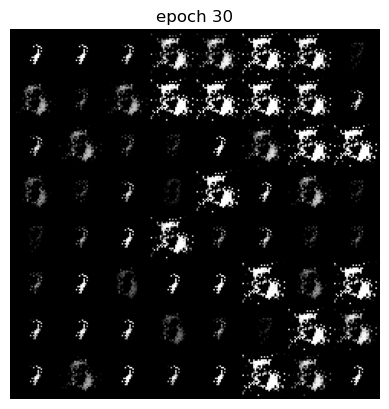

Epoch 30 of 200
Generator loss: 1.50337629, Discriminator loss: 1.02842943


118it [00:22,  5.34it/s]                         


Epoch 31 of 200
Generator loss: 1.56472059, Discriminator loss: 0.92853914


118it [00:21,  5.55it/s]                         


Epoch 32 of 200
Generator loss: 1.67968993, Discriminator loss: 0.89541123


118it [00:20,  5.87it/s]                         


Epoch 33 of 200
Generator loss: 1.82303014, Discriminator loss: 0.91029038


118it [00:20,  5.86it/s]                         


Epoch 34 of 200
Generator loss: 1.69645234, Discriminator loss: 0.92732394


118it [00:20,  5.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


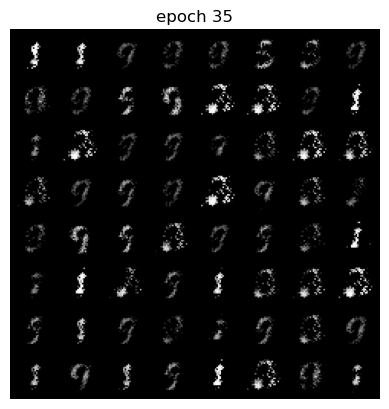

Epoch 35 of 200
Generator loss: 1.62516683, Discriminator loss: 0.94826917


118it [00:21,  5.49it/s]                         


Epoch 36 of 200
Generator loss: 1.64080264, Discriminator loss: 0.92827682


118it [00:22,  5.23it/s]                         


Epoch 37 of 200
Generator loss: 1.81095002, Discriminator loss: 0.90616737


118it [00:22,  5.32it/s]                         


Epoch 38 of 200
Generator loss: 1.68945593, Discriminator loss: 0.93351697


118it [00:21,  5.50it/s]                         


Epoch 39 of 200
Generator loss: 1.68819062, Discriminator loss: 0.90112592


118it [00:21,  5.39it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


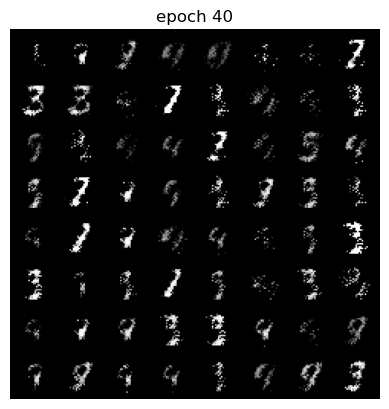

Epoch 40 of 200
Generator loss: 1.76407338, Discriminator loss: 0.87789078


118it [00:22,  5.14it/s]                         


Epoch 41 of 200
Generator loss: 1.78551838, Discriminator loss: 0.88548910


118it [00:22,  5.27it/s]                         


Epoch 42 of 200
Generator loss: 1.81462481, Discriminator loss: 0.86545458


118it [00:22,  5.30it/s]                         


Epoch 43 of 200
Generator loss: 1.75923200, Discriminator loss: 0.86718130


118it [00:22,  5.33it/s]                         


Epoch 44 of 200
Generator loss: 1.62673276, Discriminator loss: 0.92230465


118it [00:21,  5.40it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


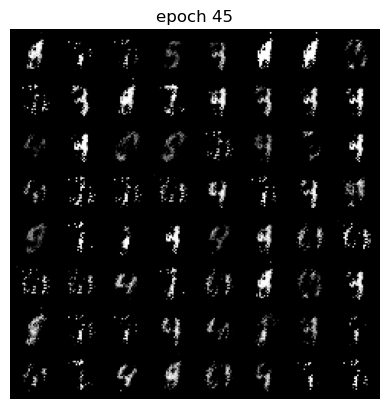

Epoch 45 of 200
Generator loss: 1.73524394, Discriminator loss: 0.91420504


118it [00:21,  5.39it/s]                         


Epoch 46 of 200
Generator loss: 1.71950213, Discriminator loss: 0.89600129


118it [00:21,  5.37it/s]                         


Epoch 47 of 200
Generator loss: 1.71396950, Discriminator loss: 0.88071324


118it [00:21,  5.44it/s]                         


Epoch 48 of 200
Generator loss: 1.63513899, Discriminator loss: 0.90470491


118it [00:21,  5.46it/s]                         


Epoch 49 of 200
Generator loss: 1.54240381, Discriminator loss: 0.93382182


118it [00:22,  5.35it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


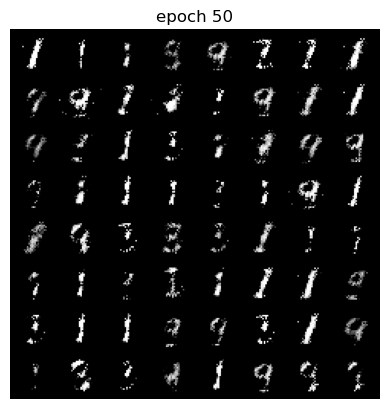

Epoch 50 of 200
Generator loss: 1.61705969, Discriminator loss: 0.93181686


118it [00:21,  5.40it/s]                         


Epoch 51 of 200
Generator loss: 1.65513866, Discriminator loss: 0.91979609


118it [00:22,  5.24it/s]                         


Epoch 52 of 200
Generator loss: 1.67601338, Discriminator loss: 0.93190477


118it [00:22,  5.27it/s]                         


Epoch 53 of 200
Generator loss: 1.54727986, Discriminator loss: 0.95619692


118it [00:20,  5.64it/s]                         


Epoch 54 of 200
Generator loss: 1.54857008, Discriminator loss: 0.94430982


118it [00:20,  5.63it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


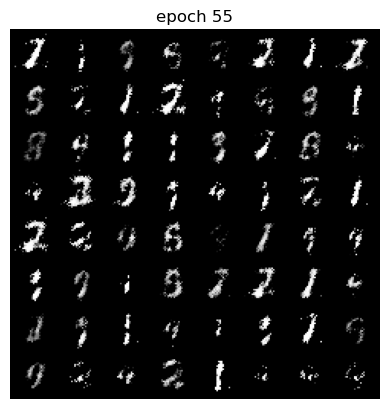

Epoch 55 of 200
Generator loss: 1.66612829, Discriminator loss: 0.93509828


118it [00:20,  5.71it/s]                         


Epoch 56 of 200
Generator loss: 1.59000624, Discriminator loss: 0.95412905


118it [00:21,  5.53it/s]                         


Epoch 57 of 200
Generator loss: 1.57972044, Discriminator loss: 0.98367279


118it [00:21,  5.57it/s]                         


Epoch 58 of 200
Generator loss: 1.49453385, Discriminator loss: 0.98708394


118it [00:20,  5.72it/s]                         


Epoch 59 of 200
Generator loss: 1.49607751, Discriminator loss: 0.96972996


118it [00:20,  5.82it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


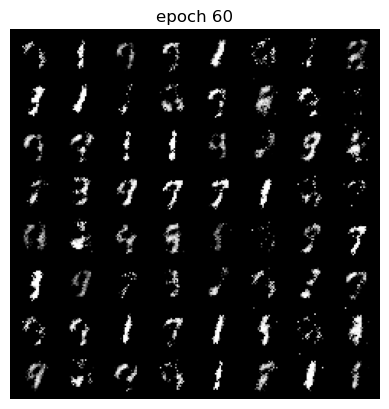

Epoch 60 of 200
Generator loss: 1.56786030, Discriminator loss: 0.95338435


118it [00:20,  5.81it/s]                         


Epoch 61 of 200
Generator loss: 1.50505695, Discriminator loss: 0.99311025


118it [00:20,  5.72it/s]                         


Epoch 62 of 200
Generator loss: 1.45535983, Discriminator loss: 0.99792659


118it [00:20,  5.73it/s]                         


Epoch 63 of 200
Generator loss: 1.45060355, Discriminator loss: 1.01176081


118it [00:20,  5.80it/s]                         


Epoch 64 of 200
Generator loss: 1.46750980, Discriminator loss: 1.00921641


118it [00:20,  5.72it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


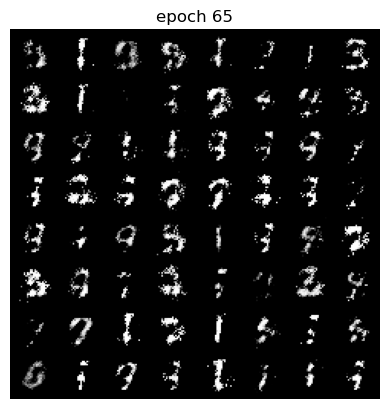

Epoch 65 of 200
Generator loss: 1.52992747, Discriminator loss: 0.98093387


118it [00:21,  5.50it/s]                         


Epoch 66 of 200
Generator loss: 1.48028115, Discriminator loss: 0.99223308


118it [00:21,  5.43it/s]                         


Epoch 67 of 200
Generator loss: 1.47836053, Discriminator loss: 0.98894584


118it [00:21,  5.56it/s]                         


Epoch 68 of 200
Generator loss: 1.40361530, Discriminator loss: 1.02493613


118it [00:20,  5.62it/s]                         


Epoch 69 of 200
Generator loss: 1.46038121, Discriminator loss: 1.00762126


118it [00:21,  5.48it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


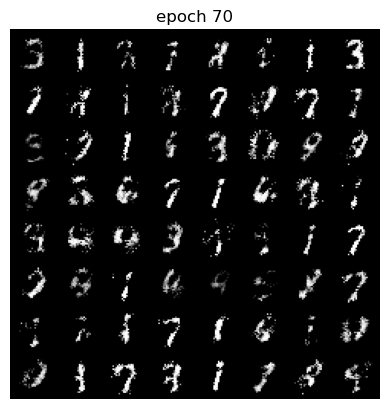

Epoch 70 of 200
Generator loss: 1.43380726, Discriminator loss: 1.00527656


118it [00:22,  5.32it/s]                         


Epoch 71 of 200
Generator loss: 1.42324107, Discriminator loss: 1.01076805


118it [00:22,  5.33it/s]                         


Epoch 72 of 200
Generator loss: 1.50018575, Discriminator loss: 1.03536734


118it [00:22,  5.24it/s]                         


Epoch 73 of 200
Generator loss: 1.46659238, Discriminator loss: 1.04683171


118it [00:21,  5.45it/s]                         


Epoch 74 of 200
Generator loss: 1.55258175, Discriminator loss: 1.00271025


118it [00:21,  5.54it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


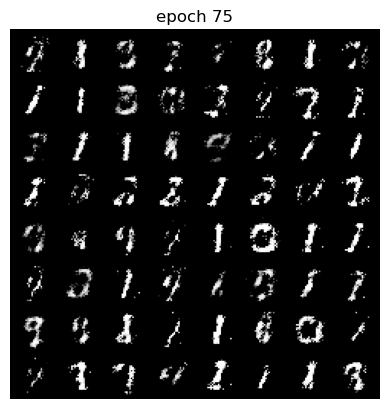

Epoch 75 of 200
Generator loss: 1.59822656, Discriminator loss: 0.96670722


118it [00:21,  5.59it/s]                         


Epoch 76 of 200
Generator loss: 1.56413387, Discriminator loss: 0.98030217


118it [00:21,  5.55it/s]                         


Epoch 77 of 200
Generator loss: 1.45433044, Discriminator loss: 1.01051514


118it [00:20,  5.72it/s]                         


Epoch 78 of 200
Generator loss: 1.51763801, Discriminator loss: 0.99353680


118it [00:24,  4.86it/s]                         


Epoch 79 of 200
Generator loss: 1.51346625, Discriminator loss: 1.00762826


118it [00:24,  4.73it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


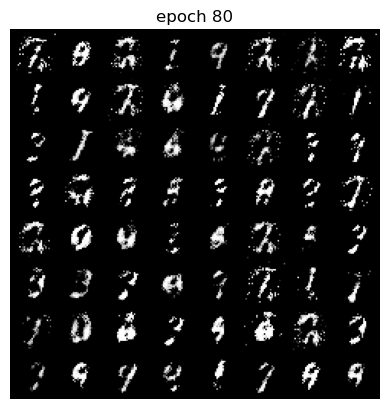

Epoch 80 of 200
Generator loss: 1.41570778, Discriminator loss: 1.04321346


118it [00:25,  4.64it/s]                         


Epoch 81 of 200
Generator loss: 1.46494837, Discriminator loss: 1.04646414


118it [00:25,  4.68it/s]                         


Epoch 82 of 200
Generator loss: 1.40864827, Discriminator loss: 1.01473568


118it [00:24,  4.74it/s]                         


Epoch 83 of 200
Generator loss: 1.33661677, Discriminator loss: 1.05322072


118it [00:26,  4.53it/s]                         


Epoch 84 of 200
Generator loss: 1.37570436, Discriminator loss: 1.05121171


118it [00:26,  4.51it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


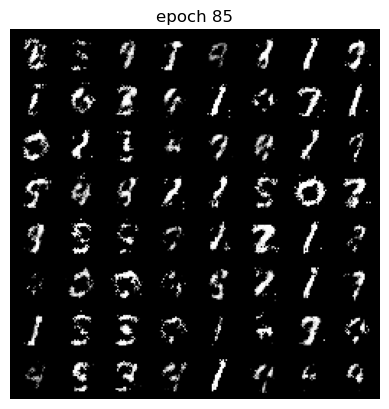

Epoch 85 of 200
Generator loss: 1.31558558, Discriminator loss: 1.06233970


118it [00:25,  4.67it/s]                         


Epoch 86 of 200
Generator loss: 1.44531944, Discriminator loss: 1.02924143


118it [00:24,  4.78it/s]                         


Epoch 87 of 200
Generator loss: 1.37128929, Discriminator loss: 1.03577195


118it [00:25,  4.62it/s]                         


Epoch 88 of 200
Generator loss: 1.46603511, Discriminator loss: 1.00179755


118it [00:25,  4.61it/s]                         


Epoch 89 of 200
Generator loss: 1.33987284, Discriminator loss: 1.06818473


118it [00:25,  4.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


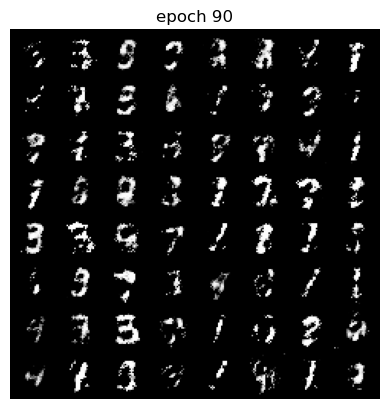

Epoch 90 of 200
Generator loss: 1.29950780, Discriminator loss: 1.07326356


118it [00:24,  4.77it/s]                         


Epoch 91 of 200
Generator loss: 1.38710485, Discriminator loss: 1.03886564


118it [00:25,  4.69it/s]                         


Epoch 92 of 200
Generator loss: 1.43891734, Discriminator loss: 1.04401257


118it [00:25,  4.60it/s]                         


Epoch 93 of 200
Generator loss: 1.31098418, Discriminator loss: 1.08697347


118it [00:25,  4.66it/s]                         


Epoch 94 of 200
Generator loss: 1.34651089, Discriminator loss: 1.06753405


118it [00:24,  4.81it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


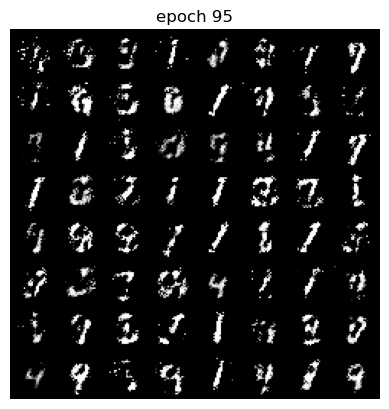

Epoch 95 of 200
Generator loss: 1.36776842, Discriminator loss: 1.05361332


118it [00:26,  4.43it/s]                         


Epoch 96 of 200
Generator loss: 1.36268079, Discriminator loss: 1.06607447


118it [00:24,  4.78it/s]                         


Epoch 97 of 200
Generator loss: 1.32347196, Discriminator loss: 1.07596369


118it [00:26,  4.51it/s]                         


Epoch 98 of 200
Generator loss: 1.36526835, Discriminator loss: 1.04965780


118it [00:24,  4.75it/s]                         


Epoch 99 of 200
Generator loss: 1.43815111, Discriminator loss: 1.03352823


118it [00:24,  4.81it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


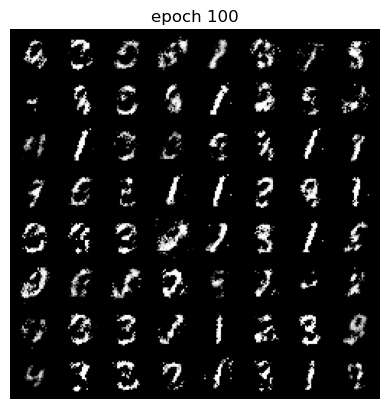

Epoch 100 of 200
Generator loss: 1.42988265, Discriminator loss: 1.04730458


118it [00:25,  4.68it/s]                         


Epoch 101 of 200
Generator loss: 1.37901757, Discriminator loss: 1.07860356


118it [00:25,  4.63it/s]                         


Epoch 102 of 200
Generator loss: 1.39394755, Discriminator loss: 1.03797891


118it [00:26,  4.52it/s]                         


Epoch 103 of 200
Generator loss: 1.41288490, Discriminator loss: 1.02857469


118it [00:24,  4.86it/s]                         


Epoch 104 of 200
Generator loss: 1.26515585, Discriminator loss: 1.09935398


118it [00:26,  4.40it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


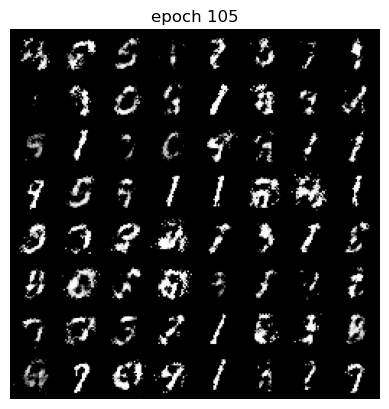

Epoch 105 of 200
Generator loss: 1.32367181, Discriminator loss: 1.05888044


118it [00:25,  4.62it/s]                         


Epoch 106 of 200
Generator loss: 1.28327513, Discriminator loss: 1.07902036


118it [00:24,  4.85it/s]                         


Epoch 107 of 200
Generator loss: 1.30873736, Discriminator loss: 1.07745945


118it [00:24,  4.74it/s]                         


Epoch 108 of 200
Generator loss: 1.25631855, Discriminator loss: 1.10877326


118it [00:24,  4.87it/s]                         


Epoch 109 of 200
Generator loss: 1.27026545, Discriminator loss: 1.08997039


118it [00:24,  4.78it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


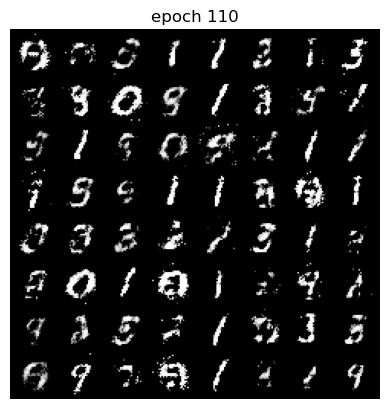

Epoch 110 of 200
Generator loss: 1.29526386, Discriminator loss: 1.06595340


118it [00:24,  4.90it/s]                         


Epoch 111 of 200
Generator loss: 1.31432408, Discriminator loss: 1.06897554


118it [00:23,  4.95it/s]                         


Epoch 112 of 200
Generator loss: 1.28643524, Discriminator loss: 1.10042108


118it [00:24,  4.83it/s]                         


Epoch 113 of 200
Generator loss: 1.25691508, Discriminator loss: 1.10412171


118it [00:24,  4.88it/s]                         


Epoch 114 of 200
Generator loss: 1.31364764, Discriminator loss: 1.08323125


118it [00:23,  4.96it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


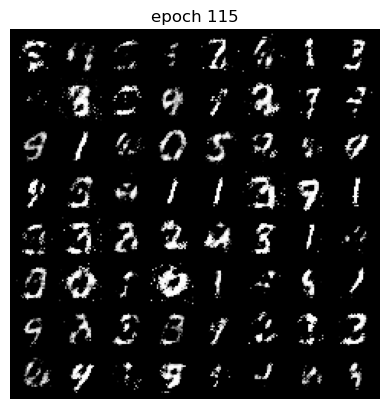

Epoch 115 of 200
Generator loss: 1.38294233, Discriminator loss: 1.07023214


118it [00:24,  4.83it/s]                         


Epoch 116 of 200
Generator loss: 1.30696402, Discriminator loss: 1.08129733


118it [00:24,  4.86it/s]                         


Epoch 117 of 200
Generator loss: 1.29442707, Discriminator loss: 1.08373622


118it [00:23,  4.93it/s]                         


Epoch 118 of 200
Generator loss: 1.28790619, Discriminator loss: 1.08915171


118it [00:23,  4.94it/s]                         


Epoch 119 of 200
Generator loss: 1.33924777, Discriminator loss: 1.06615422


118it [00:25,  4.66it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


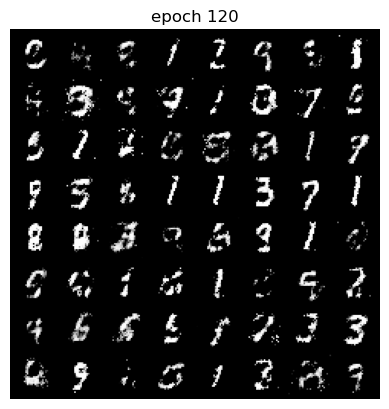

Epoch 120 of 200
Generator loss: 1.28410087, Discriminator loss: 1.09190248


118it [00:26,  4.49it/s]                         


Epoch 121 of 200
Generator loss: 1.26986015, Discriminator loss: 1.08687591


118it [00:25,  4.63it/s]                         


Epoch 122 of 200
Generator loss: 1.28015703, Discriminator loss: 1.10418887


118it [00:27,  4.34it/s]                         


Epoch 123 of 200
Generator loss: 1.31526357, Discriminator loss: 1.09699182


118it [00:25,  4.55it/s]                         


Epoch 124 of 200
Generator loss: 1.35830855, Discriminator loss: 1.07432323


118it [00:25,  4.62it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


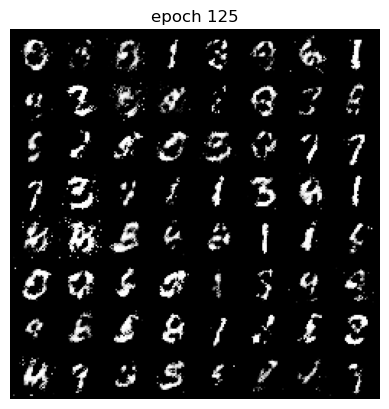

Epoch 125 of 200
Generator loss: 1.34198409, Discriminator loss: 1.07208699


118it [00:26,  4.41it/s]                         


Epoch 126 of 200
Generator loss: 1.30225531, Discriminator loss: 1.08447778


118it [00:27,  4.25it/s]                         


Epoch 127 of 200
Generator loss: 1.29163704, Discriminator loss: 1.08510862


118it [00:25,  4.57it/s]                         


Epoch 128 of 200
Generator loss: 1.22585888, Discriminator loss: 1.10882179


118it [00:25,  4.55it/s]                         


Epoch 129 of 200
Generator loss: 1.26996062, Discriminator loss: 1.10027740


118it [00:25,  4.58it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


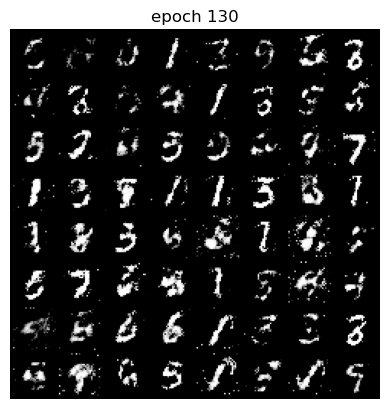

Epoch 130 of 200
Generator loss: 1.21179040, Discriminator loss: 1.12001377


118it [00:26,  4.47it/s]                         


Epoch 131 of 200
Generator loss: 1.15893198, Discriminator loss: 1.14289155


118it [00:27,  4.33it/s]                         


Epoch 132 of 200
Generator loss: 1.23947712, Discriminator loss: 1.11002239


118it [00:26,  4.46it/s]                         


Epoch 133 of 200
Generator loss: 1.18608607, Discriminator loss: 1.12278720


118it [00:27,  4.30it/s]                         


Epoch 134 of 200
Generator loss: 1.21539863, Discriminator loss: 1.12503972


118it [00:26,  4.41it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


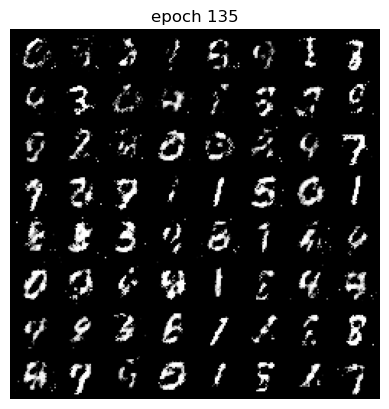

Epoch 135 of 200
Generator loss: 1.14236323, Discriminator loss: 1.15803241


118it [00:26,  4.38it/s]                         


Epoch 136 of 200
Generator loss: 1.18228486, Discriminator loss: 1.14537312


118it [00:25,  4.56it/s]                         


Epoch 137 of 200
Generator loss: 1.16988612, Discriminator loss: 1.14374181


118it [00:27,  4.21it/s]                         


Epoch 138 of 200
Generator loss: 1.19588006, Discriminator loss: 1.12601774


118it [00:25,  4.65it/s]                         


Epoch 139 of 200
Generator loss: 1.16537181, Discriminator loss: 1.14561758


118it [00:26,  4.46it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


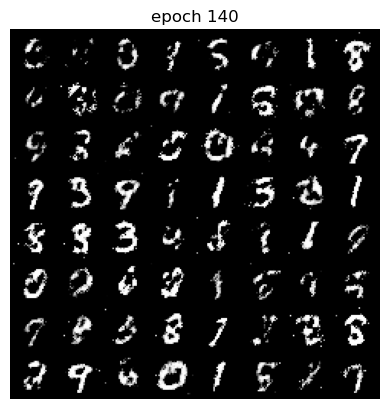

Epoch 140 of 200
Generator loss: 1.16335288, Discriminator loss: 1.14839751


118it [00:27,  4.23it/s]                         


Epoch 141 of 200
Generator loss: 1.12863173, Discriminator loss: 1.16690602


118it [00:26,  4.41it/s]                         


Epoch 142 of 200
Generator loss: 1.18601767, Discriminator loss: 1.14591466


118it [00:25,  4.61it/s]                         


Epoch 143 of 200
Generator loss: 1.17981037, Discriminator loss: 1.14351780


118it [00:29,  4.07it/s]                         


Epoch 144 of 200
Generator loss: 1.19537344, Discriminator loss: 1.12606513


118it [00:27,  4.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


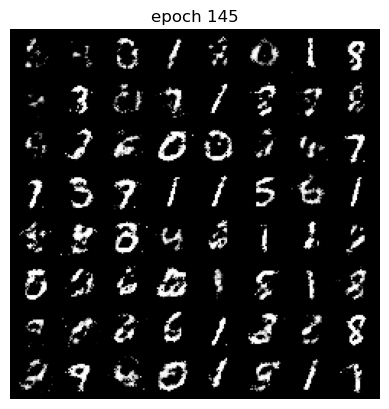

Epoch 145 of 200
Generator loss: 1.19876536, Discriminator loss: 1.12230329


118it [00:26,  4.50it/s]                         


Epoch 146 of 200
Generator loss: 1.20418456, Discriminator loss: 1.12744732


118it [00:28,  4.14it/s]                         


Epoch 147 of 200
Generator loss: 1.11318542, Discriminator loss: 1.16839294


118it [00:27,  4.37it/s]                         


Epoch 148 of 200
Generator loss: 1.15087740, Discriminator loss: 1.13882230


118it [00:27,  4.31it/s]                         


Epoch 149 of 200
Generator loss: 1.16790578, Discriminator loss: 1.13835105


118it [00:25,  4.64it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


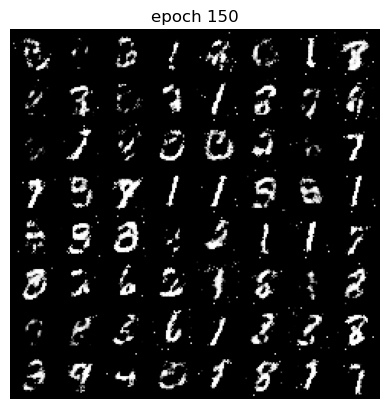

Epoch 150 of 200
Generator loss: 1.17181764, Discriminator loss: 1.13885910


118it [00:26,  4.44it/s]                         


Epoch 151 of 200
Generator loss: 1.13126688, Discriminator loss: 1.16572368


118it [00:27,  4.36it/s]                         


Epoch 152 of 200
Generator loss: 1.18545860, Discriminator loss: 1.14598660


118it [00:26,  4.46it/s]                         


Epoch 153 of 200
Generator loss: 1.19044665, Discriminator loss: 1.13225508


118it [00:25,  4.55it/s]                         


Epoch 154 of 200
Generator loss: 1.19201625, Discriminator loss: 1.13018292


118it [00:27,  4.29it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


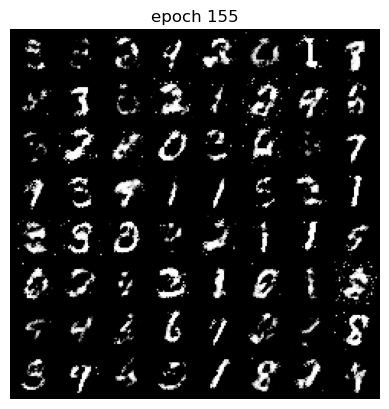

Epoch 155 of 200
Generator loss: 1.15252503, Discriminator loss: 1.15755626


118it [00:25,  4.70it/s]                         


Epoch 156 of 200
Generator loss: 1.14912637, Discriminator loss: 1.15789783


118it [00:27,  4.22it/s]                         


Epoch 157 of 200
Generator loss: 1.18460732, Discriminator loss: 1.12478991


118it [00:27,  4.33it/s]                         


Epoch 158 of 200
Generator loss: 1.15710327, Discriminator loss: 1.14397577


118it [00:27,  4.37it/s]                         


Epoch 159 of 200
Generator loss: 1.15337190, Discriminator loss: 1.15281894


118it [00:25,  4.59it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


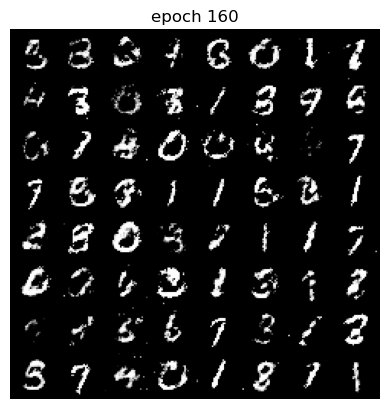

Epoch 160 of 200
Generator loss: 1.12694931, Discriminator loss: 1.15703286


118it [00:25,  4.59it/s]                         


Epoch 161 of 200
Generator loss: 1.13604944, Discriminator loss: 1.15242427


118it [00:25,  4.64it/s]                         


Epoch 162 of 200
Generator loss: 1.17177432, Discriminator loss: 1.15224417


118it [00:24,  4.79it/s]                         


Epoch 163 of 200
Generator loss: 1.13035647, Discriminator loss: 1.15786861


118it [00:24,  4.77it/s]                         


Epoch 164 of 200
Generator loss: 1.16263457, Discriminator loss: 1.14793562


118it [00:26,  4.46it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


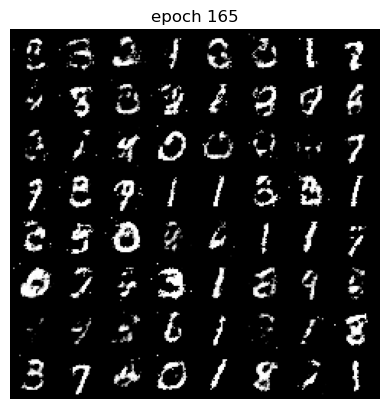

Epoch 165 of 200
Generator loss: 1.17947329, Discriminator loss: 1.13925804


118it [00:26,  4.49it/s]                         


Epoch 166 of 200
Generator loss: 1.17414683, Discriminator loss: 1.14689136


118it [00:25,  4.56it/s]                         


Epoch 167 of 200
Generator loss: 1.16584687, Discriminator loss: 1.13926443


118it [00:25,  4.54it/s]                         


Epoch 168 of 200
Generator loss: 1.17633410, Discriminator loss: 1.14386880


118it [00:25,  4.58it/s]                         


Epoch 169 of 200
Generator loss: 1.16375079, Discriminator loss: 1.15005649


118it [00:24,  4.81it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


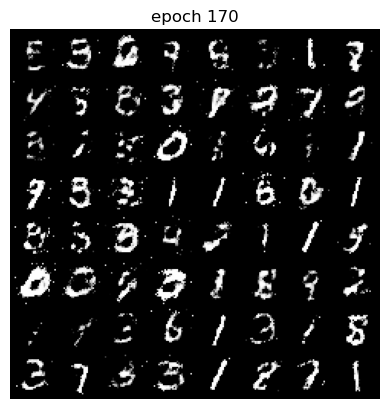

Epoch 170 of 200
Generator loss: 1.18311562, Discriminator loss: 1.14277472


118it [00:25,  4.68it/s]                         


Epoch 171 of 200
Generator loss: 1.13874223, Discriminator loss: 1.15729646


118it [00:25,  4.71it/s]                         


Epoch 172 of 200
Generator loss: 1.14884292, Discriminator loss: 1.14628672


118it [00:24,  4.73it/s]                         


Epoch 173 of 200
Generator loss: 1.13424919, Discriminator loss: 1.15884191


118it [00:24,  4.79it/s]                         


Epoch 174 of 200
Generator loss: 1.11725323, Discriminator loss: 1.17185014


118it [00:24,  4.81it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


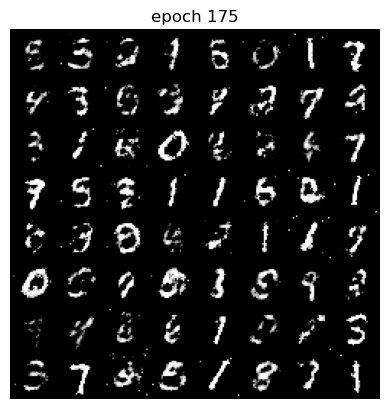

Epoch 175 of 200
Generator loss: 1.09177377, Discriminator loss: 1.17702262


118it [00:25,  4.65it/s]                         


Epoch 176 of 200
Generator loss: 1.12247208, Discriminator loss: 1.16696692


118it [00:25,  4.62it/s]                         


Epoch 177 of 200
Generator loss: 1.09070882, Discriminator loss: 1.17932909


118it [00:24,  4.75it/s]                         


Epoch 178 of 200
Generator loss: 1.05541101, Discriminator loss: 1.20612420


118it [00:24,  4.73it/s]                         


Epoch 179 of 200
Generator loss: 1.06666304, Discriminator loss: 1.19032755


118it [00:25,  4.67it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


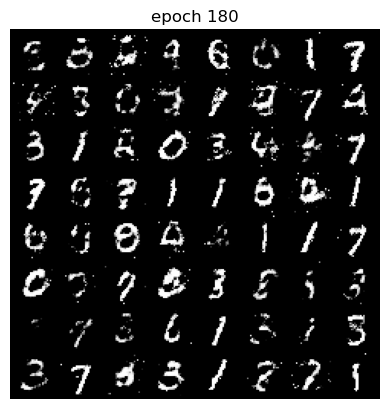

Epoch 180 of 200
Generator loss: 1.11447147, Discriminator loss: 1.17649667


118it [00:24,  4.89it/s]                         


Epoch 181 of 200
Generator loss: 1.07687771, Discriminator loss: 1.19484397


118it [00:23,  4.92it/s]                         


Epoch 182 of 200
Generator loss: 1.07394687, Discriminator loss: 1.18960566


118it [00:24,  4.84it/s]                         


Epoch 183 of 200
Generator loss: 1.03876909, Discriminator loss: 1.21028163


118it [00:24,  4.88it/s]                         


Epoch 184 of 200
Generator loss: 1.08347938, Discriminator loss: 1.18073968


118it [00:24,  4.91it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


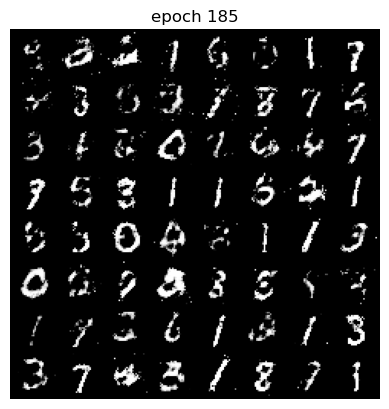

Epoch 185 of 200
Generator loss: 1.07399421, Discriminator loss: 1.18684672


118it [00:23,  4.98it/s]                         


Epoch 186 of 200
Generator loss: 1.07235440, Discriminator loss: 1.18892276


118it [00:24,  4.86it/s]                         


Epoch 187 of 200
Generator loss: 1.06249490, Discriminator loss: 1.19595798


118it [00:24,  4.87it/s]                         


Epoch 188 of 200
Generator loss: 1.02901426, Discriminator loss: 1.21050645


118it [00:23,  4.97it/s]                         


Epoch 189 of 200
Generator loss: 1.05463103, Discriminator loss: 1.20795935


118it [00:24,  4.84it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


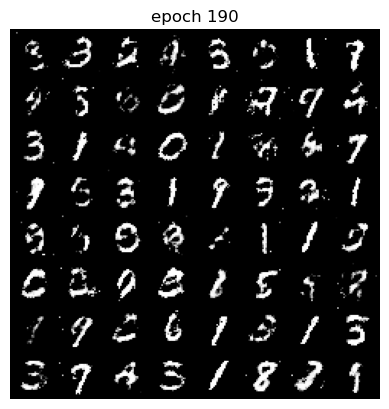

Epoch 190 of 200
Generator loss: 1.06037283, Discriminator loss: 1.20842609


118it [00:24,  4.85it/s]                         


Epoch 191 of 200
Generator loss: 1.05848993, Discriminator loss: 1.19319036


118it [00:24,  4.87it/s]                         


Epoch 192 of 200
Generator loss: 1.07952553, Discriminator loss: 1.19577195


118it [00:24,  4.87it/s]                         


Epoch 193 of 200
Generator loss: 1.06829424, Discriminator loss: 1.18782249


118it [00:24,  4.90it/s]                         


Epoch 194 of 200
Generator loss: 1.07063245, Discriminator loss: 1.19034325


118it [00:24,  4.88it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


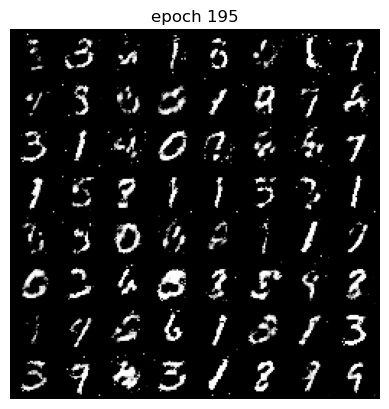

Epoch 195 of 200
Generator loss: 1.09742225, Discriminator loss: 1.19011189


118it [00:24,  4.84it/s]                         


Epoch 196 of 200
Generator loss: 1.06853055, Discriminator loss: 1.18269194


118it [00:24,  4.89it/s]                         


Epoch 197 of 200
Generator loss: 1.09015417, Discriminator loss: 1.18985075


118it [00:23,  4.94it/s]                         


Epoch 198 of 200
Generator loss: 1.02625722, Discriminator loss: 1.20829201


118it [00:25,  4.70it/s]                         


Epoch 199 of 200
Generator loss: 1.03035453, Discriminator loss: 1.21556549


118it [00:24,  4.80it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


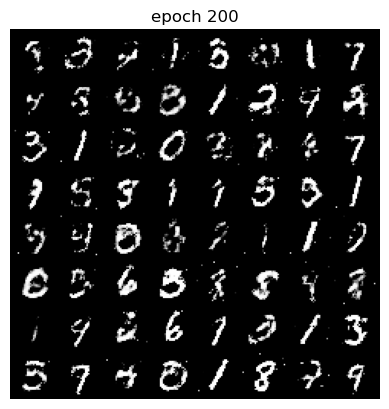

Epoch 200 of 200
Generator loss: 1.07557184, Discriminator loss: 1.19177724


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        image, _ = data
        image = image.to(device)
        b_size = len(image)
        
        # train discriminator
        for _ in range(k):
            data_fake = generator(create_noise(b_size, nz)).detach()
            data_real = image
            b_size = data_real.size(0)
            real_label = label_real(b_size)
            fake_label = label_fake(b_size)
            optim_d.zero_grad()
            output_real = discriminator(data_real)
            loss_real = discriminator_loss(output_real, real_label)
            output_fake = discriminator(data_fake)
            loss_fake = discriminator_loss(output_fake, fake_label)
            loss_real.backward()
            loss_fake.backward()
            optim_d.step()
            loss_d += loss_real.detach().numpy() + loss_fake.detach().numpy()

        # train generator
        data_fake = generator(create_noise(b_size, nz))
        b_size = data_fake.size(0)
        real_label = label_real(b_size)
        optim_g.zero_grad()
        output = discriminator(data_fake)
        loss = generator_loss(output, real_label)
        loss.backward()
        optim_g.step()
        loss_g += loss.detach().numpy()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0 or epoch==0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

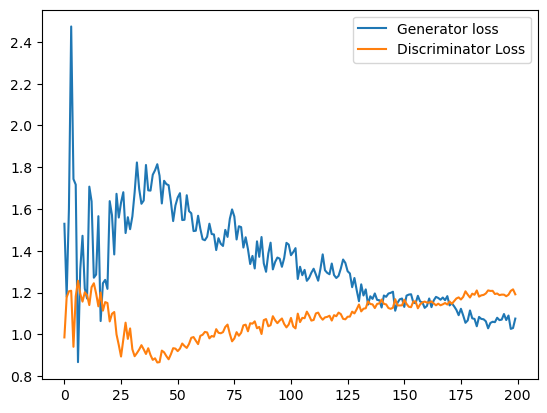

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')